In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [96]:
df=pd.read_csv("HousingData.csv")

In [97]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [98]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [99]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [100]:
x=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y=df['MEDV']

In [101]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

In [102]:
# Fill missing values in x_train and x_test with the mean of each column
x_train.fillna(x_train.mean(), inplace=True)
x_test.fillna(x_test.mean(), inplace=True)


In [108]:
# Fit the model with the imputed data
model=LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [114]:
y_pred=model.predict(x_test)
y_pred

array([26.36074629, 22.59019154, 29.07257393, 11.42484827, 21.55616272,
       19.62869717, 20.16577392, 21.64626223, 19.32979142, 20.01466244,
        4.16185498, 15.87943089, 16.74774127,  5.11609373, 39.24033433,
       32.97517959, 21.83689861, 36.28076355, 31.7599251 , 23.74001452,
       25.12115473, 23.268256  , 21.02396344, 30.63730691, 22.80543133,
        8.46610924, 17.71150275, 17.58141484, 36.19387157, 21.0387982 ,
       17.66935401, 17.3569126 , 19.30635883, 23.21783425, 28.9210384 ,
       19.29968299, 11.08372016, 24.07108351, 17.54700836, 15.13742301,
       26.24443939, 21.55563668, 23.80134532, 14.61900008, 23.92456343,
       24.90011129, 19.76552927, 22.91724916, 10.00626031, 24.71824318,
       21.49089613, 18.86349939, 24.51997303, 31.16686406, 12.77617608,
       22.2134437 , 21.25039603, 16.03517833, 12.22551089, 22.69119078,
       18.1750257 , 21.93795401, 32.52431853, 31.40990648, 17.44901703,
       33.20485978, 19.17917354, 19.49145766, 19.86195219, 23.98

In [111]:
model.score(x_train,y_train)

0.7626142150729315

In [112]:
model.score(x_test,y_test)

0.6156407976163996

In [113]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Take the square root to get the root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 5.603728081312209


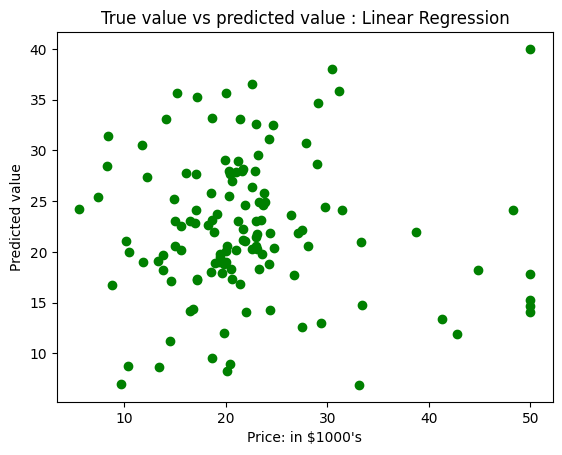

In [107]:
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()